In [476]:
def get_random_points(a, b, n):
    x = list()
    for i in range(n):
        temp = random.uniform(a, b)
        x.append(temp)
    return x

In [477]:
def get_desired_points(X):
    d = list()
    for x1,x2 in X:
        if (x2 < 1/5 * math.sin(10*x1) + 0.3) or ((x2 - 0.8)**2 + (x1 - 0.5)**2 < (0.15)**2):
            d.append(1)
        else:
            d.append(-1)
    return d

In [478]:
# test scenario
def get_x_test():
    x = [[1,1],[2,2],[-1,-1],[-1,-2],[-2,0]]
    return x

In [479]:
# test scenario
C_p = [[1,1],[2,2]]
C_n = [[-1,-1],[-1,-2],[-2,0]]
def get_d_test(X):
    d = list()
    for x in X:
        if x in C_p:
            d.append(1)
        if x in C_n:
            d.append(-1)
    return d

In [480]:
def linear_kernel(xi,xj):
    return np.dot(xi.T,xj)

In [481]:
def polynomial_kernel(Xi,Xj,d):
    return (1 + np.dot(Xi.T,Xj))**d

In [482]:
def check_symmetric(a, tol=1e-8):
    return np.allclose(a, a.T, atol=tol)

In [483]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from numpy.linalg import norm
from cvxopt import solvers, matrix

In [484]:
def gaussian_kernel(Xi,Xj,sigma):
    return math.exp(-(norm(Xi - Xj)**2/sigma**2))

In [485]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [486]:
## test
X =  get_x_test()
D = get_d_test(X)

In [487]:
X1 = get_random_points(0, 1, 100)
X2 = get_random_points(0, 1, 100)
X = [[ele1,ele2] for ele1,ele2 in zip(X1,X2)]
D = get_desired_points(X)

In [488]:
np.array(X).shape

(100, 2)

In [489]:
d=3

In [490]:
def get_p(X,D,kernel='poly',param=2):
    P = []
    for i in range(len(D)):
        row = []
        for j in range(len(D)):
            if kernel is 'poly':
                temp = D[i] * D[j] * polynomial_kernel(np.array(X[i]),np.array(X[j]),param)
            elif kernel is 'gaussian':
                temp = D[i] * D[j] * gaussian_kernel(np.array(X[i]),np.array(X[j]),param)
            elif kernel is 'linear':
                temp = D[i] * D[j] * linear_kernel(np.array(X[i]),np.array(X[j]))               
            row.append(temp)
        P.append(row)
    return P

In [491]:
def get_alpha(X,D,kernel='poly',param=2):
    P= get_p(X,D,'poly',2)
    P = matrix(np.array(P), (len(D),len(D)), 'd')
    q = matrix(-1 * np.ones(len(D)))
    h = matrix(np.zeros(len(D)))
    G = matrix(-1 * np.eye(len(D))) ##
    b = matrix([0], (1,1), 'd')
    A = matrix(D, (1,len(D)) , 'd')
    sol=solvers.qp( P, q, G, h, A, b)
    return (np.array(list(sol['x'])))

In [511]:
#filtering for best 10
def get_support_vector(alpha):
    k = alpha.argsort()[::-1]
    return k[2]

#### g(x)

In [512]:
gx = list()
for j in range(len(D)):
    temp = 0
    for i in range(len(D)):
        temp += alpha[i] * D[i] * polynomial_kernel(np.array(X[i]),X[j],2)
    g_x = temp + theta
    gx.append(temp)
gx

[0.00014495849609375,
 0.000240325927734375,
 0.0001392364501953125,
 0.0002002716064453125,
 0.000141143798828125,
 0.00017642974853515625,
 0.0002460479736328125,
 0.0001964569091796875,
 5.7220458984375e-05,
 0.000514984130859375,
 2.384185791015625e-05,
 0.00022411346435546875,
 0.000431060791015625,
 0.00030517578125,
 0.000102996826171875,
 0.00018405914306640625,
 8.20159912109375e-05,
 0.0002384185791015625,
 0.0002923011779785156,
 0.00021457672119140625,
 0.00016450881958007812,
 0.0003814697265625,
 0.00014972686767578125,
 0.0002460479736328125,
 0.00015735626220703125,
 0.00024318695068359375,
 0.000186920166015625,
 0.0001373291015625,
 -1.430511474609375e-05,
 0.0001239776611328125,
 0.00014209747314453125,
 0.0002155303955078125,
 0.000240325927734375,
 0.00040912628173828125,
 0.000209808349609375,
 0.00013828277587890625,
 0.0001068115234375,
 0.00022125244140625,
 0.0001678466796875,
 0.00020122528076171875,
 0.00012683868408203125,
 0.000125885009765625,
 4.38690185

In [513]:
def get_theta(alpha,X,D,K,kernel='poly',param=2):
    temp = 0
    for i in range(len(D)):
        if kernel is 'poly':
             temp += - alpha[i] * D[i] * polynomial_kernel(np.array(X[i]),np.array(X[K]),param) # param: degree for poly kernel
        elif kernel is 'linear':
            temp += - alpha[i] * D[i] * linear_kernel(np.array(X[i]),np.array(X[K]))
        elif kernel is 'gaussian':
            temp += - alpha[i] * D[i] * gaussian_kernel(np.array(X[i]),np.array(X[K]),param) #parma: sigma
    theta = D[K] - temp
    return theta

In [514]:
def get_gx(alpha,X,D,theta,Xk,kernel='poly',param=2):
    temp = 0
    for i in range(len(D)):
        if kernel is 'poly':
            temp += alpha[i] * D[i] * polynomial_kernel(np.array(X[i]),Xk,param)
        elif kernel is 'linear':
            temp += alpha[i] * D[i] * linear_kernel(np.array(X[i]),Xk)
        elif kernel is 'gaussian':
            temp += alpha[i] * D[i] * gaussian_kernel(np.array(X[i]),Xk,param)
    g_x = temp + theta
    return(g_x)      

In [515]:
X1 = get_random_points(0, 1, 100)
X2 = get_random_points(0, 1, 100)
X = [[ele1,ele2] for ele1,ele2 in zip(X1,X2)]
D = get_desired_points(X)

In [516]:
alpha = get_alpha(X,D,'poly',3)
K = get_support_vector(alpha)

     pcost       dcost       gap    pres   dres
 0: -6.6707e+01 -1.9368e+02  3e+02  1e+01  3e+00
 1: -2.2338e+02 -3.7103e+02  2e+02  6e+00  2e+00
 2: -6.8250e+02 -8.7035e+02  2e+02  5e+00  1e+00
 3: -2.8544e+03 -3.1296e+03  3e+02  4e+00  1e+00
 4: -1.8910e+04 -1.9838e+04  9e+02  4e+00  1e+00
 5: -1.6300e+05 -1.6814e+05  5e+03  4e+00  1e+00
 6: -2.7161e+06 -2.7607e+06  4e+04  4e+00  1e+00
 7: -1.4364e+08 -1.4402e+08  4e+05  4e+00  1e+00
 8: -5.2247e+10 -5.2253e+10  6e+06  4e+00  1e+00
 9: -6.0924e+10 -6.0930e+10  7e+06  4e+00  1e+00
10: -6.0944e+10 -6.0951e+10  7e+06  4e+00  1e+00
11: -6.1619e+10 -6.1626e+10  7e+06  4e+00  1e+00
12: -1.2785e+11 -1.2787e+11  1e+07  4e+00  1e+00
13: -1.6021e+11 -1.6022e+11  2e+07  4e+00  1e+00
14: -2.6282e+11 -2.6285e+11  3e+07  4e+00  1e+00
15: -4.4856e+11 -4.4861e+11  4e+07  4e+00  1e+00
16: -6.6579e+11 -6.6584e+11  5e+07  4e+00  1e+00
Terminated (singular KKT matrix).


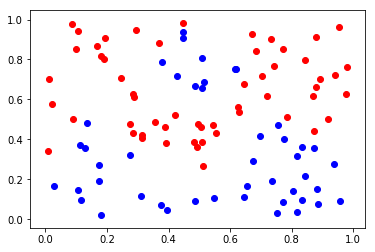

In [517]:
for (x, y), d in zip(X, D):
    if d is 1:
        plt.scatter(x, y, color='b', marker='o')
    elif d is -1:
        plt.scatter(x, y, color='r', marker='o')
theta = get_theta(alpha,X, D, K)

-1.00335693359375
-1.0030441284179688
-1.0027999877929688
-1.002655029296875
-1.0024490356445312
-1.002105712890625
-1.0019912719726562
-1.0018081665039062
-1.0016059875488281
-1.0014724731445312
-1.0013236999511719
-1.0011138916015625
-1.0009994506835938
-1.0008697509765625
-1.0007362365722656
-1.0006103515625
-1.0004959106445312
-1.0003833770751953
-1.0002918243408203
-1.0002021789550781
-1.0001153945922852
-1.0000495910644531
-0.9999723434448242
-0.9999032020568848
-0.9998359680175781
-0.9998269081115723
-0.9997537136077881
-0.999761700630188
-0.9997533559799194
-0.9996365308761597
-1.0032119750976562
-1.002960205078125
-1.0028305053710938
-1.0025253295898438
-1.0022735595703125
-1.0022125244140625
-1.0020217895507812
-1.0018577575683594
-1.0015487670898438
-1.0014610290527344
-1.0013351440429688
-1.0011405944824219
-1.0010108947753906
-1.0008659362792969
-1.0007362365722656
-1.0006256103515625
-1.0005149841308594
-1.0004100799560547
-1.0003042221069336
-1.0002117156982422
-1.000124

-0.9999465942382812
-1.0000152587890625
-1.0027804374694824
-1.0025949478149414
-1.0023467540740967
-1.002187967300415
-1.0020012259483337
-1.0018367767333984
-1.0016780123114586
-1.0015479440335184
-1.0013978779315948
-1.0012513399124146
-1.001128077507019
-1.001007080078125
-1.0008912086486816
-1.0007715225219727
-1.0006842613220215
-1.0005998611450195
-1.000523567199707
-1.000387191772461
-1.0003795623779297
-1.0003032684326172
-1.000223159790039
-1.000131607055664
-1.0002079010009766
-1.0001144409179688
-1.0001564025878906
-1.0000534057617188
-1.0000877380371094
-1.000152587890625
-1.0000801086425781
-1.0001258850097656
-1.0027234554290771
-1.0025289058685303
-1.0023261308670044
-1.002170741558075
-1.001980498433113
-1.0018136138096452
-1.001658134162426
-1.0015166401863098
-1.0013786554336548
-1.0012344121932983
-1.001098394393921
-1.000981330871582
-1.0008559226989746
-1.0007662773132324
-1.0006771087646484
-1.000563621520996
-1.000497817993164
-1.0003910064697266
-1.000337600708

-1.00030517578125
-1.000396728515625
-1.0002899169921875
-1.00018310546875
-1.000091552734375


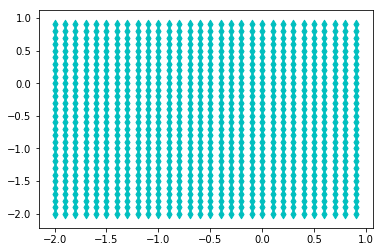

In [518]:
new_range = np.arange(-2, 1, 0.1)
for x1 in new_range:
    for x2 in new_range:
        g = get_gx(alpha, X, D, theta, np.array([x1, x2]), 'poly', 2)
        print(g)
        if (g <= 1.1 and g >= 0.9):
            plt.scatter(x1, x2, color='m', marker='d')
        if ((g >= -1.1) and (g <= -0.9)):
            plt.scatter(x1, x2, color='c', marker='d')
        if ((g >= -0.1) and (g <= 0.1)):
            plt.scatter(x1, x2, color='y', marker='d')
plt.show()

#### test example

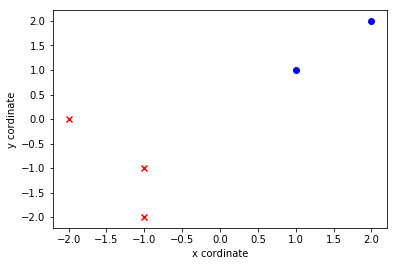

In [261]:
plt.scatter([ele[0] for ele in C_p], [ele[1] for ele in C_p] , color='b',marker='o')
plt.scatter([ele[0] for ele in C_n], [ele[1] for ele in C_n] , color='r',marker='x')
plt.xlabel('x cordinate')
plt.ylabel('y cordinate')
# plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.show()

In [456]:
# def plot()
new_range = np.arange(-1,1,0.4)
theta = get_theta(X,D,K)
plt.scatter([ele[0] for ele in C_p], [ele[1] for ele in C_p] , color='b',marker='o')
plt.scatter([ele[0] for ele in C_n], [ele[1] for ele in C_n] , color='r',marker='x')
plt.xlabel('x cordinate')
plt.ylabel('y cordinate')
for x1 in new_range:
    for x2 in new_range:
        g = get_gx(alpha,X,D,theta,np.array([x1,x2]))
        if (g <= 1.1 and g >= 0.9):
            plt.scatter(x1,x2, color = 'm', marker='d')
        if ((g>=-1.1) and (g<= -0.9)):
            plt.scatter(x1,x2, color = 'c', marker='d')
        if ((g>=-0.1) and (g<= 0.1)):
            plt.scatter(x1,x2, color = 'y', marker='d')
plt.show()

TypeError: get_theta() missing 1 required positional argument: 'K'

In [69]:
theta

In [43]:
# get the equation of hyperplane -done
# plot the g(x) functions
# then mix matcth hyperplance equations -done tried poly, linear, gaussian